In [1]:
import numpy as np                          # linear algebra
import os                                   # used for loading the data
from sklearn.metrics import confusion_matrix# confusion matrix to carry out error analysis
import seaborn as sn                        # heatmap
from sklearn.utils import shuffle           # shuffle the data
import matplotlib.pyplot as plt             # 2D plotting library
import cv2                                  # image processing library
import tensorflow as tf 

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 10,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['seg_train/seg_train', 'seg_test/seg_test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory =  dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        
        output.append((images, labels))

    return output

In [10]:
os.chdir('/kaggle/input/intel-image-classification')

In [11]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [12]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150, 3)


In [13]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

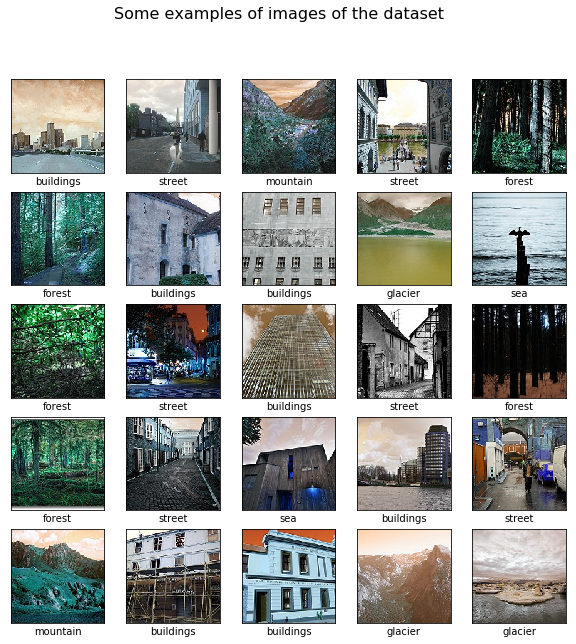

In [14]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2,2) , padding='same', activation='relu', input_shape = (150, 150, 3)), # the nn will learn the good filter to use
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (2, 2), activation = 'relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2, 2), activation = 'relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=100, validation_split = 0.2, 
          verbose=2, shuffle=True)

Train on 11227 samples, validate on 2807 samples
Epoch 1/100
11227/11227 - 8s - loss: 0.0276 - accuracy: 0.9922 - val_loss: 1.1386 - val_accuracy: 0.8037
Epoch 2/100
11227/11227 - 8s - loss: 0.0332 - accuracy: 0.9909 - val_loss: 1.1664 - val_accuracy: 0.8219
Epoch 3/100
11227/11227 - 8s - loss: 0.0202 - accuracy: 0.9943 - val_loss: 1.0905 - val_accuracy: 0.8322
Epoch 4/100
11227/11227 - 8s - loss: 0.0195 - accuracy: 0.9950 - val_loss: 1.0740 - val_accuracy: 0.8229
Epoch 5/100
11227/11227 - 8s - loss: 0.0217 - accuracy: 0.9937 - val_loss: 1.2072 - val_accuracy: 0.8219
Epoch 6/100
11227/11227 - 8s - loss: 0.0389 - accuracy: 0.9885 - val_loss: 1.1381 - val_accuracy: 0.8165
Epoch 7/100
11227/11227 - 8s - loss: 0.0317 - accuracy: 0.9914 - val_loss: 1.4142 - val_accuracy: 0.7976
Epoch 8/100
11227/11227 - 8s - loss: 0.0411 - accuracy: 0.9894 - val_loss: 1.3157 - val_accuracy: 0.8151
Epoch 9/100
11227/11227 - 8s - loss: 0.0259 - accuracy: 0.9929 - val_loss: 1.2159 - val_accuracy: 0.8201
Epoch 

Epoch 78/100
11227/11227 - 8s - loss: 0.0162 - accuracy: 0.9949 - val_loss: 2.1258 - val_accuracy: 0.8026
Epoch 79/100
11227/11227 - 8s - loss: 0.0436 - accuracy: 0.9917 - val_loss: 2.0175 - val_accuracy: 0.8044
Epoch 80/100
11227/11227 - 8s - loss: 0.0219 - accuracy: 0.9947 - val_loss: 1.9729 - val_accuracy: 0.8158
Epoch 81/100
11227/11227 - 8s - loss: 0.0219 - accuracy: 0.9949 - val_loss: 1.9048 - val_accuracy: 0.8237
Epoch 82/100
11227/11227 - 8s - loss: 0.0138 - accuracy: 0.9965 - val_loss: 2.2002 - val_accuracy: 0.8076
Epoch 83/100
11227/11227 - 7s - loss: 0.0208 - accuracy: 0.9953 - val_loss: 2.5227 - val_accuracy: 0.7937
Epoch 84/100
11227/11227 - 8s - loss: 0.0157 - accuracy: 0.9961 - val_loss: 2.2861 - val_accuracy: 0.8108
Epoch 85/100
11227/11227 - 8s - loss: 0.0206 - accuracy: 0.9954 - val_loss: 2.5374 - val_accuracy: 0.8076
Epoch 86/100
11227/11227 - 8s - loss: 0.0205 - accuracy: 0.9948 - val_loss: 2.3472 - val_accuracy: 0.8133
Epoch 87/100
11227/11227 - 8s - loss: 0.0102 -

In [29]:
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)

3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.4534163409868874, 0.81633335]


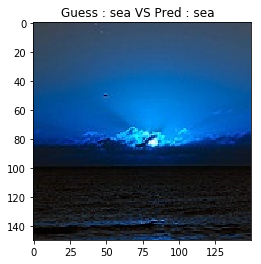

In [30]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

title = 'Guess : {} VS Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

In [31]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()

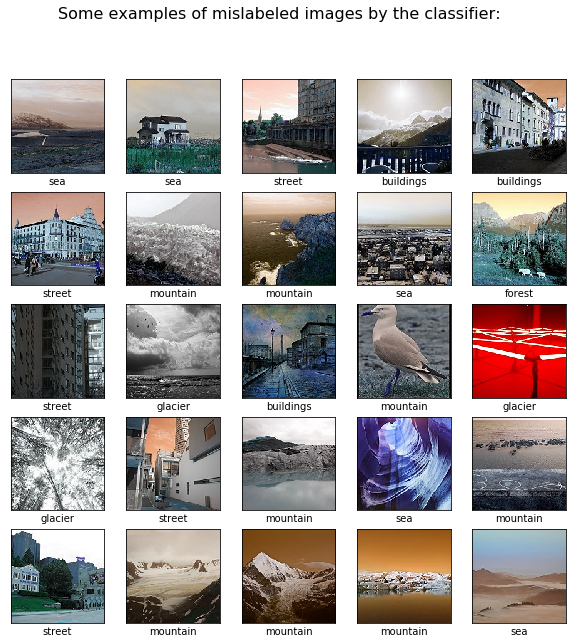

In [32]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=False,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()